# FOWS Demo

This demo notebook will show the rationale behind the experiments perfomed in the 'Spotting tell-tale visual artifacts in face swapping  videos: strengths and pitfalls of CNN detectors' paper (todo: add link to paper).

The first section will display how the videos were preprocessed to extract the subject faces from them and separate them between occluded and non-occluded. Some examples of the resulting preprocessing will be shown.

The different tested baselines will be made available to test with. You just need to select the video and what kind of frames, either occluded (occ) or non-occluded (no_occ), you would like the model to preprocess. As a final step the model's prediction will be plotted to show the classification of real and fake images.


## Instruction for use
1. Clone the repository (or upload the repository on gDrive if you have already cloned it).
  
  Please note that cloning the repository in Colab will save it inside Colab's temporary memory. Meaning that, once the session is disconnected, every modification you did to the code will be deleted. In case you want to preserve your modification, please uploade to drive the cloned repo and connect colab to your Drive.
2. Upload the pretrained models in the model_weights folder
3. Install the requirements. Please note that you may need to restart the session to correctly install the packages.
4. Start by apply the proprocessing to the videos. You can raun this just once since both videos will be preprocessed.
5. Then, select either the occluded (occ) or non_occluded (no_occ) portion of the video to be analyzed with the pretrained model
6. Load the model and compute the predictions on the selected portion of the model
7. In general, try to pay attention to the comments and instruction reported in each section

## Clone the Repository and Install Requirements

In [1]:
# clone the repository
!git clone https://github.com/RickyZi/FOWS_test.git

Cloning into 'FOWS_test'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 191 (delta 57), reused 20 (delta 7), pack-reused 85 (from 1)
Receiving objects: 100% (191/191), 65.08 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Updating files: 100% (25/25), done.


In [2]:
# access the demo folder
# %cd /content/drive/MyDrive/Colab Notebooks/FOWS_demo
# %cd /content/FOWS_test/
#notebook_demo/

/content/FOWS_test


In [3]:
# connect notebook to you google Drive (if you want to save the results to the cloned repo uploaded to your gDrive)
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#@title Install Requirements
#@markdown After installing the requirements restart the session to ensure the packages have been correctly installed. This is especially important for mediapipe since it might throw some errors otherwise.

#@markdown To restart the session: Runtime -> Restart Session (or Ctrl + M)


# test frames and face extraction with mediapipe face detector
!pip install mediapipe==0.10.20

# install mediapy to show video in colab demo
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy

# install gdown to download baseline weights from gDrive
!pip install gdown


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is inco

In [5]:
# restart the session (reset the kernel) -> an error message will be displayed and then the session will be restarted
# follow the next

# import os
# os.kill(os.getpid(), 9)

# %reset

In [6]:
# exit()

In [7]:
# %%time
# # deps installation
# try:
#   import mediapipe as mp
#   print(mp.__version__) # should be 0.10.20
# except ImportError:
#   !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
#   !pip install -e detectron2_repo
#   print('Stopping RUNTIME! Please run again.')
#   import os
#   os.kill(os.getpid(), 9)

In [1]:
#@markdown Once you have restarted the session, please run again this cell to make sure the correct version of mediapipe has been installed (0.10.20)
# run this cell to make sure the correct version has been installed
import mediapipe as mp
print(mp.__version__) # should be 0.10.20

0.10.20


In [1]:
#@markdown Download the pretrained baseline weights (it may take a while to complete the download)
#@markdown Please make sure the baseline_weights have been correctly places inside the /content/FOWS_test/model_weights/ folder
# --------------------------------------------------- #
# download the drive folder with the baseline weights #
# --------------------------------------------------- #
%cd /content/FOWS_test/model_weights/
# download the weights in the desired folder
import gdown
# url to shared baseline_weights folder
url = 'https://drive.google.com/drive/folders/1SWbPq-VtTXsvAr6yiXryMy_kRtyt0Xmd?usp=drive_link'
# output = 'baseline_weights.zip'

gdown.download_folder(url)
print("done downloading baseline weights")

/content/FOWS_test/model_weights


Retrieving folder contents


Retrieving folder 1yY_5yuXDgUWEDe4U07INqwq45m_01XSR FT
Retrieving folder 1qOjnaURCUm-E1SUi7Y7e6WE5Tt42ptBo effnetb4
Processing file 1sbpKwC7ggYJigr1_amA4fyNEOSLOyVEe effnetb4_fows_no_occ_FT.pth
Processing file 1jUWH80SmrzrI5gjyohBckxzcS0fsuNVA effnetb4_fows_occ_FT.pth
Processing file 1QMWJ-7F2P_4hQByO4c5WC_lSPvZAOqcW effnetb4_gotcha_no_occ_FT.pth
Processing file 1QoBl9vV966RCa2dFUTSGlrBNxKBs3goK effnetb4_gotcha_occ_FT.pth
Retrieving folder 1wXx2DqPEf1KYmLXM9XZm2p5iWUjroktc mnetv2
Processing file 12p9WhptoeUUxzGN-ExsxXetpJnaYSI5c mnetv2_fows_no_occ_FT.pth
Processing file 1RNwtQ8zuz6xHT2qnNQzTizI0a1n5DQOd mnetv2_fows_occ_FT.pth
Processing file 1JsbilaiBgIpazLCm3M54p4BTVRGi5Cbj mnetv2_gotcha_no_occ_FT.pth
Processing file 1wODDNW_Xo933o69-_sCkwvJBueQS40_L mnetv2_gotcha_occ_FT.pth
Retrieving folder 1tX8QXnYM1eYY7rsl0Op4ocCZslf9IXIE xception
Processing file 1CxcwNqzQIoOnwXkGZYQlKt8axe3CbCk7 xception_fows_no_occ_FT.pth
Processing file 1FTm5iRC91o0F7MF9Z3HbAecZ9npT89IJ xception_fows_occ_FT.pth

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1sbpKwC7ggYJigr1_amA4fyNEOSLOyVEe
From (redirected): https://drive.google.com/uc?id=1sbpKwC7ggYJigr1_amA4fyNEOSLOyVEe&confirm=t&uuid=a392a43c-ebba-4d56-880a-3f1e99fecad5
To: /content/FOWS_test/model_weights/baseline_weights/FT/effnetb4/effnetb4_fows_no_occ_FT.pth
100%|██████████| 212M/212M [00:03<00:00, 61.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1jUWH80SmrzrI5gjyohBckxzcS0fsuNVA
From (redirected): https://drive.google.com/uc?id=1jUWH80SmrzrI5gjyohBckxzcS0fsuNVA&confirm=t&uuid=27acffc3-70ef-4e28-a4a6-b586e393be3e
To: /content/FOWS_test/model_weights/baseline_weights/FT/effnetb4/effnetb4_fows_occ_FT.pth
100%|██████████| 212M/212M [00:03<00:00, 59.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1QMWJ-7F2P_4hQByO4c5WC_lSPvZAOqcW
From (redirected): https://drive.google.com/u

done downloading baseline weights



Download completed


In [2]:
#@markdown Important: after the session have been restarted and the models downloaded, access again the repo folder


# --------------------------------------------------------------- #
# -------------------------- IMPORTANT -------------------------- #
# you might need to restart the session to use mediapipe on colab #
# if so access again the repo folder: %cd /content/FOWS_test/     #
%cd /content/FOWS_test/
# --------------------------------------------------------------- #

/content/FOWS_test


## Preprocess Videos

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
import os
import sys
import timm
import yaml
import glob
import matplotlib.pyplot as plt
import glob
import numpy as np
import cv2
import mediapy as media
from PIL import Image

In [4]:
# if you had to restart the notebook to solve some mediapipe error (i.e. import preprocessing.frame_and_faces_extraction) access again the FOWS repo
# update the path with the one where you cloned the repo #

# ------------------------------------------------------------ #
# another critical point: there might be an error importing

# %cd /content/FOWS_test/
from notebook_demo.demo_utils import *
from preprocessing.frame_and_faces_extraction import *

In [5]:
import sys
import os

# add the repo to the sys.path
# Important to have reference for loading FocalLoss definition
repo_path = '/content/FOWS_test/' # update the repo_path with your path to the repo

if repo_path not in sys.path:
    sys.path.append(repo_path)

In [6]:
#@title Select Video

#@markdown Select the video to preprocess (faces extraction from video frames).

#@markdown NOTE that to select a video you need to run this cell every time
#@markdown


# select video to show
vid = 'obj_occlusion' #@param ["hand_occlusion", "obj_occlusion"]
if vid == 'hand_occlusion':
  VIDEO_REAL = './notebook_demo/demo_videos/real/hand_occ_real.avi'
  VIDEO_FAKE = './notebook_demo/demo_videos/fake/hand_occ_fake.avi'
else:
  VIDEO_REAL = './notebook_demo/demo_videos/real/obj_occ_real.avi'
  VIDEO_FAKE = './notebook_demo/demo_videos/fake/obj_occ_fake.avi'
  # '/content/drive/MyDrive/Colab Notebooks/FOWS_demo/demo_videos/fake/obj_occ_fake.avi'




In [7]:
#@title Display REAL video
#@markdown Video takes 30/40 seconds to be displayed
# takes 30s  circa to show video

# print(f"{vid} REAL VIDEO")
# Read, resize, and display a video:
video_real = media.read_video(VIDEO_REAL)
# print(f'Shape is (num_images, height, width, num_channels) = {video2.shape}.') # 396, 1080, 1920, 3
# if metadata := video2.metadata:
#   print(f'Framerate is {metadata.fps} frames/s.') # 30 fps
video3 = media.resize_video(video_real, tuple(np.array(video_real.shape[1:3]) // 3)) # 1/4 28 sec
media.show_video(video3)

In [8]:
#@title Display FAKE video
# print(f"{vid} FAKE VIDEOS")
# Read, resize, and display a video:
video_fake = media.read_video(VIDEO_FAKE)
# print(f'Shape is (num_images, height, width, num_channels) = {video2.shape}.') # 396, 1080, 1920, 3
# if metadata := video2.metadata:
#   print(f'Framerate is {metadata.fps} frames/s.') # 30 fps
video3 = media.resize_video(video_fake, tuple(np.array(video_fake.shape[1:3]) // 3)) # 1/4 28 sec
media.show_video(video3) #, codec='gif')

In [9]:
#@title Perform FOWS pre-processing on the REAL video

#@markdown This cell performs the faces extraction from each frame of the video.
#@markdown It will create different folders for each challenge (hand_occ, obj_occ) and place the extracted faces into those folders.

#@markdown This step has been done for both real and fake video. Please run this and also the next cell to process all videos.


#@markdown TODO clean output (reduce messages, remove sanity check)


# -------------------------------------------------------------- #

print("\nREAL_VIDEOS")
# hand_occ_1
# obj_occ_1
# real_vid = '/content/drive/MyDrive/Colab Notebooks/FOWS_demo/demo_videos/real/'
# real_faces = '/content/drive/MyDrive/Colab Notebooks/FOWS_demo/user_faces/real/'
real_vid = './notebook_demo/demo_videos/real/'
real_faces = './notebook_demo/user_faces/real/'
if not os.path.exists(real_faces):
  print("creating subfolders...")
  create_subfolders_demo(real_faces)
else:
  print("subfolders already exist")
  extract_subfolders(real_faces)

# breakpoint()

extract_faces_from_videos(extract_files(real_vid), extract_subfolders(real_faces))
print("\nsanity check: ")
# add sanity check to see if the number of frames extracted from the original videos is correct (390 frames)
for sub in extract_subfolders(real_faces):
    print("sub:", sub)
    print(len(extract_files(sub)))
    if len(extract_files(sub)) != 390: # check if all frames extracte from the video
        print("ERROR: number of frames extracted from the real videos is not correct")
    else:
        print("number of frames extracted from the real videos is correct")



REAL_VIDEOS
creating subfolders...
extracting faces from video: ./notebook_demo/demo_videos/real/obj_occ_real.avi
saving faces to: ./notebook_demo/user_faces/real/obj_occlusion
done
extracting faces from video: ./notebook_demo/demo_videos/real/hand_occ_real.avi
saving faces to: ./notebook_demo/user_faces/real/hand_occlusion
done

sanity check: 
sub: ./notebook_demo/user_faces/real/obj_occlusion
390
number of frames extracted from the real videos is correct
sub: ./notebook_demo/user_faces/real/hand_occlusion
390
number of frames extracted from the real videos is correct


In [10]:
#@title Perform FOWS pre-processing on the FAKE video
print("\nFAKE_VIDEOS")
# hand_occ_1_ghost
# obj_occ_1_ghost
# facedancer_vid = '/content/drive/MyDrive/Colab Notebooks/FOWS_demo/demo_videos/fake/'
# facedancer_faces = '/content/drive/MyDrive/Colab Notebooks/FOWS_demo/user_faces/fake/'
#
fake_vid = './notebook_demo/demo_videos/fake/'
fake_faces = './notebook_demo/user_faces/fake/'
if not os.path.exists(fake_faces):
  print("creating subfolders...")
  create_subfolders_demo(fake_faces)
else:
  print("subfolders already exist")
  extract_subfolders(fake_faces)


extract_faces_from_videos(extract_files(fake_vid), extract_subfolders(fake_faces))
print("\nsanity check: ")
# add sanity check to see if the number of frames extracted from the original videos is correct (390 frames)
for sub in extract_subfolders(fake_faces):
    print("sub:", sub)
    print(len(extract_files(sub)))
    if len(extract_files(sub)) != 390:
        print("ERROR: number of frames extracted from the fake videos is not correct")
    else:
        print("number of frames extracted from the fake videos is correct")


# # ------------------------------------------------------------------------------- #
# # Organize Occ and No-Occ faces
# dataset_path = './notebook_demo/user_faces/' #'user_faces/'
# preprocessed_path = './notebook_demo/preprocessed_faces/' #'preprocessed_faces/'
# organize_frames(dataset_path, preprocessed_path)
# check_num_frames(preprocessed_path)


FAKE_VIDEOS
creating subfolders...
extracting faces from video: ./notebook_demo/demo_videos/fake/obj_occ_fake.avi
saving faces to: ./notebook_demo/user_faces/fake/obj_occlusion
done
extracting faces from video: ./notebook_demo/demo_videos/fake/hand_occ_fake.avi
saving faces to: ./notebook_demo/user_faces/fake/hand_occlusion
done

sanity check: 
sub: ./notebook_demo/user_faces/fake/obj_occlusion
390
number of frames extracted from the fake videos is correct
sub: ./notebook_demo/user_faces/fake/hand_occlusion
390
number of frames extracted from the fake videos is correct


In [11]:
# ------------------------------------------------------------------------------- #
#@title Organize Occluded and Non-Occluded Faces

#@markdown NOTE: this step was performed automatically with the fows_dataset_preprocessing script (in the preprocessing folder), and then was fine-tuned manually to ensure all images were correctly classified as occluded (occ) or non occluded (no_occ).
#@markdown
#@markdown In this demo the frames organization will be hardcoded based on our preprocessed dataset.

#@markdown Please run this cell to correctly separate occ and no_occ frames in their respective fodler for each real and fake video.

dataset_path = './notebook_demo/user_faces/' #'user_faces/'
preprocessed_path = './notebook_demo/preprocessed_faces/' #'preprocessed_faces/'
organize_frames(dataset_path, preprocessed_path)
check_num_frames(preprocessed_path)

Directory ./notebook_demo/preprocessed_faces/obj_occlusion/real/no_occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/obj_occlusion/real/occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/obj_occlusion/fake/no_occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/obj_occlusion/fake/occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/hand_occlusion/real/no_occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/hand_occlusion/real/occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/hand_occlusion/fake/no_occ contains exactly 100 frames.
Directory ./notebook_demo/preprocessed_faces/hand_occlusion/fake/occ contains exactly 100 frames.


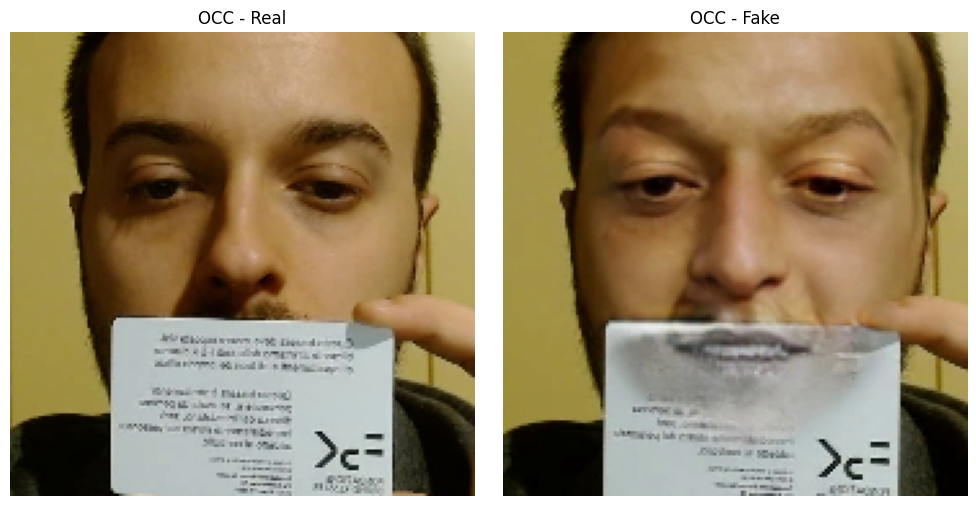

In [13]:
#@title Show real and fake images
#@markdown Here you can select the portion of the video on which to focus the analysis.
#@markdown The occluded (occ) or the non-occluded (no_occ) portion of the video can be used for  computing the model's prediction (which will be displayed in the last section).

#@markdown IMPORTAN run this cell every time you change the selected portion of the video.

#@markdown Please NOTE that in case you select another video (i.e. hand_occ instead of obj_occ), you need to run the 'Select Video' cell, you can skip the preprocessing step again, and directly run this cell to show some example of the selected portion of the video from both real and fake videos.



frames_type = 'occ' #@param ["occ", "no_occ"]

#  Define the paths to the preprocessed real and fake faces
# frames_type = train_dataset.split('_')[1] + '_' + train_dataset.split('_')[2]
real_faces_dir = preprocessed_path+f'{vid}/real/{frames_type}/'
fake_faces_dir = preprocessed_path+f'{vid}/fake/{frames_type}/'
# print(real_faces_dir)
# print(fake_faces_dir)

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

# # Read the images using cv2
# print("Checking directory:", real_faces_dir)
# print("Files found:", glob.glob(real_faces_dir+'/*'))

real_image_path = glob.glob(real_faces_dir+'/*.jpg')[0]
fake_image_path = glob.glob(fake_faces_dir+'/*.jpg')[0]

real_image_bgr = cv2.imread(real_image_path)
fake_image_bgr = cv2.imread(fake_image_path)

# Convert BGR to RGB for matplotlib display
real_image_rgb = cv2.cvtColor(real_image_bgr, cv2.COLOR_BGR2RGB)
fake_image_rgb = cv2.cvtColor(fake_image_bgr, cv2.COLOR_BGR2RGB)

# Resize the image to be 1/3 the size
real_image_rgb = cv2.resize(real_image_rgb, (real_image_rgb.shape[1] // 3, real_image_rgb.shape[0] // 3))
fake_image_rgb = cv2.resize(fake_image_rgb, (fake_image_rgb.shape[1] // 3, fake_image_rgb.shape[0] // 3))

# Plot the occ image
axes[0].imshow(real_image_rgb)
axes[0].set_title(f'{frames_type.upper()} - Real')
axes[0].axis('off') # Hide axes ticks

# Plot the no_occ image
axes[1].imshow(fake_image_rgb) # Corrected variable name here
axes[1].set_title(f'{frames_type.upper()} - Fake')
axes[1].axis('off') # Hide axes ticks

# Adjust layout to prevent titles from overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Select the pretrained model and Plot the predictions

In [ ]:
# if you had to restart the notebook to solve some mediapipe error, access again the FOWS repo
# update the path with the one where you cloned the repo
# %cd /content/FOWS_test/
# from notebook_demo.demo_utils import *
# from preprocessing.frame_and_faces_extraction import *

In [14]:
#@title Select the model
#@markdown Here you can selected the pretrained baseline model to perform the analysis on the frames selected before.

#@markdown Please use the dropdown menu to select the baseline_model, the training_strategy (either FineTuning or TransferLearning), and the dataset the models was trained on.

#@markdown IMPORTANT: run this cell every time you change something in the selection.

# -------------------------------------------------------------------- #

baseline_model = 'xception' #@param ["mnetv2", "effnetb4", "xception"]
trn_strategy = 'FT' #@param ["FT", "TL"]

train_dataset = 'fows_occ' #@param ["fows_occ", "fows_no_occ", "gotcha_occ", "gotcha_no_occ"]
# frames_type = 'occ' #@param ["occ", "no_occ"]
# dataset = train_dataset + '_' + frames_type

model_str = f'{baseline_model}_{train_dataset}_{trn_strategy}'

# print(model_str)

In [15]:
# define where the model weights are saved
model_weights_path = './model_weights/' # for repo test
# model_weights_path = '/content/drive/MyDrive/Colab Notebooks/FOWS_demo/model_weight/' # gdrive folder with all models
if not os.path.exists(model_weights_path):
    print(f"Model path {model_weights_path} does not exist")
    sys.exit()

In [16]:
# load the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("device:", device)
model_path = get_model_path(model_weights_path, model_str)
model = load_model_from_path(baseline_model, model_path)
model.to(device)
model.eval()

./model_weights/baseline_weights/FT/xception/xception_fows_occ_FT.pth
./model_weights/baseline_weights/FT/xception/xception_fows_occ_FT.pth
Loading pretrained XceptionNet model...


/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [ ]:
#@title Compute the predicitons for each face in the video and plot the results


In [17]:
#@title Prepare data to compute the model prediction

#@markdown After you have performed all preprocessing steps, you can run this cell only once to prepare the data to be given in input to the model


# get the test transf to prepare the data given in input to the model
test_trasnf = get_test_transf()
# get the path to the real and fake imag
real_images = glob.glob(real_faces_dir+'/*.jpg')
fake_images = glob.glob(fake_faces_dir+'/*.jpg')

# Apply test_transform to all images
original_imgs = [test_trasnf(Image.open(img).convert('RGB')) for img in real_images]
original_imgs_tensor = torch.stack(original_imgs, dim=0)  # Shape: (100, 3, 224, 224)
fake_imgs = [test_trasnf(Image.open(img).convert('RGB')) for img in fake_images]
fake_imgs_tensor = torch.stack(fake_imgs, dim=0)  # Shape: (100, 3, 224, 224)

In [18]:
#@title Compute the model predictions (model forward pass).

#@markdown IMPORTAN run this cell every time you want to compute the model prediction.
#@markdown For example, in case you selected another baseline you will have to: run the model selection cell to confirm the selection, load the baseline, run this cell to compute and plot the models prediciton.
# compute the model predictions (forward_pass)
original_all_probs = np.array(model_forward_pass(original_imgs_tensor, model, device))
# original_all_probs.shape # (100,)
# original_all_probs
fake_all_probs = np.array(model_forward_pass(fake_imgs_tensor, model, device))
# fake_all_probs.shape # (100,)
# original_all_probs

# Plot the model predictions
plot_prob_graph(original_all_probs, fake_all_probs, model_str, frames_type)

In [ ]:
#@title old code snippets / test TO BE REMOVED

### ------------------------------------------------------------------------------------------------------ ###
# to download folder from Gdrive -> gdown
# ! pip install gdown
# gdown 'link_to_gDrive_shared_folder'
# then we'll need to unzip the folder and make sure its placed in the correct position of the the repo

# easier to do with gdrive than with OneDrive (we might decide where to share the data)
### ------------------------------------------------------------------------------------------------------ ###
# NOTE: for now test with model shared only inside FBK (then will be extended to anyone with the link)

# # # Create a dummy focalLoss.py file that imports FocalLoss from demo_utils
# with open('focalLoss.py', 'w') as f:
#     # f.write('from utilscripts.focalLoss import FocalLoss\n')
#     f.write('from notebook_demo.demo_utils import FocalLoss\n')

# print("Created dummy focalLoss.py file.")

# import sys
# import os

# # add the repo to the sys.path
# # Important to have reference for loading FocalLoss definition
# repo_path = '/content/FOWS_test/notebook_demo/' # update the repo_path with your path to the repo

# if repo_path not in sys.path:
#     sys.path.append(repo_path)

# from utilscripts.focalLoss import FocalLoss
# from notebook_demo.demo_utils import FocalLoss
# from notebook_demo.demo_utils import *